# Demonstrate the Effect of the MuPDF Dehyphenation Flag
We will demonstrate here the impact of MuPDF's `TEXT_DEHYPHENATE` flag on extracted text and computed text boundary boxes.

First we import PyMuPDF and make a memory PDF with some hyphenated text.

In [1]:
# uncomment the following line(s) to ensure that all packages are available:
# !python -m pip install matplotlib
# !python -m pip install -U pymupdf

%matplotlib inline
import fitz  # import PyMuPDF

def show_image(pix):
    """Display a pixmap using matplotlib and numpy."""
    import matplotlib.pyplot as plt  # needed for displaying intermediate images
    import numpy as np  # needed for displaying intermediate images
    img = np.ndarray((pix.h, pix.w, 3), dtype=np.uint8, buffer=pix.samples_mv)  # raw image to numpy array
    image = plt.imshow(img)  # let matplotlib show the image

text = (
    "This is a longer text with hyphena-\n"
    "ted words. It will be extracted using\n"
    "different flags.\n"
    "This will show, how bit settings influ-\n"
    "ence text bbox computations."
)

doc = fitz.open()
page = doc.new_page(width=500,height=300)
rect = page.rect +(72, 72, 0, 0)
_ = page.insert_textbox(rect, text, fontsize=24)

We take a look at the created page:

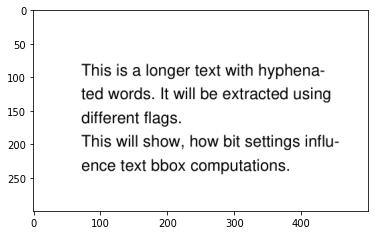

In [2]:
pix = page.get_pixmap()
show_image(pix)

First we do a simple extraction, using no special options. Under normal conditions, this should reproduce the text as shown in the file:

In [3]:
# using no special flags
print(page.get_text("text", flags=0))

This is a longer text with hyphena-
ted words. It will be extracted using
different flags.
This will show, how bit settings influ-
ence text bbox computations.



Now extract using the dehyphenation option.

Please note that lines are joined with their successors if they end with a hyphen.

In [4]:
# using the dehyphenation flag
print(page.get_text("text", flags=fitz.TEXT_DEHYPHENATE))

This is a longer text with hyphenated words. It will be extracted using
different flags.
This will show, how bit settings influence text bbox computations.

